In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank=pd.read_csv("bank.csv",sep=";")

## Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bank.shape

(41188, 21)

In [11]:
bank.duplicated().sum()

12

In [12]:
bank.drop_duplicates(inplace=True)

In [13]:
bank.shape

(41176, 21)

### Univariate Analysis of Categorical Columns

Analysis of Job

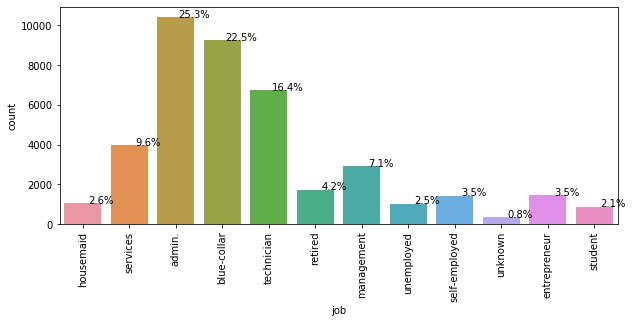

In [14]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='job',data=bank)
plt.xticks(rotation='vertical')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

So, most of the customers are from Blue-collar,technician and admin jobs.

Analysis of Marital

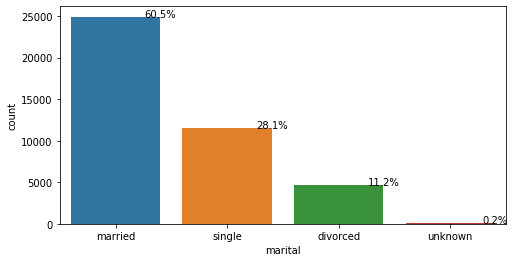

In [15]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='marital',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Most of the customers contacted are married.

Analysis of Education

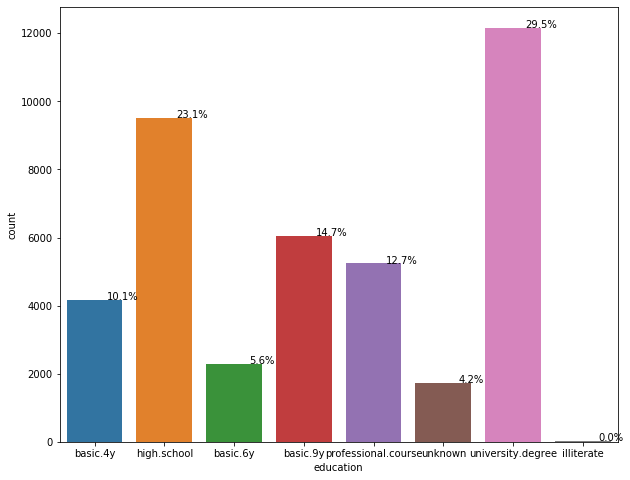

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='education',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of the customers have university degree and high school.

Analysis of Default

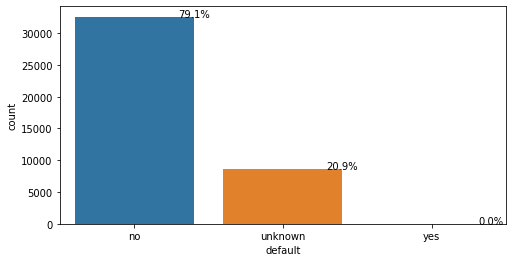

In [17]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='default',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers haven't defaulted . So this column can be removed. Very low variance.

Analysis of Housing

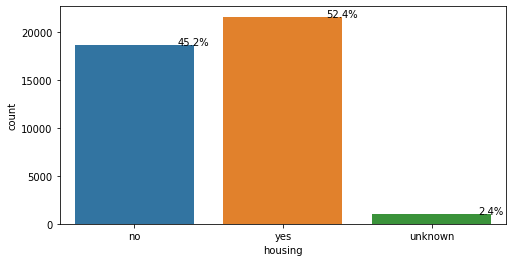

In [18]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='housing',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Almost equal split of whether the customers have taken home loan or not

Analysis of Loan

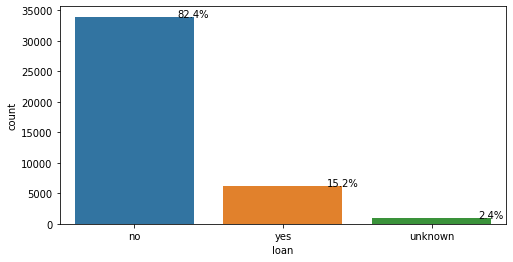

In [19]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='loan',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers haven't taken any personal loan

Analysis of Month

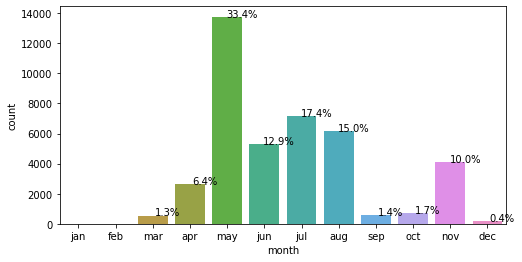

In [20]:
plt.figure(figsize=(8,4))
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax=sns.countplot(x='month',data=bank,order=months)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Most of the people were called during May-Aug during the current campaign

Analysis of poutcome (Previous campaign outcome)

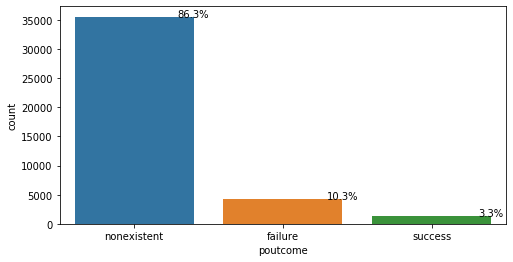

In [21]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='poutcome',data=bank)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(bank))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Most of the Previous campaign outcomes are unknown, so better data collection is needed.

### Q.2. Perform the following pre-processing tasks: 🡪10 marks <br>
#### a. Missing Value Analysis<br>
#### b. Label Encoding wherever required<br>
#### c. Selecting important features based on Random Forest<br>
#### d. Handling unbalanced data using SMOTE<br>
#### e. Standardize the data using any one of the scalers provided by sklearn<br>


In [22]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing value in dataset

In [23]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [24]:
colname=[]
for x in bank.columns:
    if bank[x].dtype=='object' or bank[x].dtype=='float' :
        colname.append(x)

In [25]:
colname

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [26]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    bank[x]=le.fit_transform(bank[x])

In [27]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,8,18,16,287,8,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,8,18,16,287,8,0


### Q.3. Build the following Supervised Learning models: 🡪5 marks <br>
#### 	a. Logistic Regression <br>
#### 	b. Decision Trees<br>
#### 	c. Random Forest<br>

In [28]:
X = bank.iloc[:,0:-1]
Y = bank.iloc[:,-1]

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28823, 20)
(28823,)
(12353, 20)
(12353,)


# LOGESTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

In [33]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.95827131, 0.04172869],
       [0.98552493, 0.01447507],
       [0.88867297, 0.11132703],
       ...,
       [0.50268532, 0.49731468],
       [0.93028066, 0.06971934],
       [0.94254064, 0.05745936]])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10739   286]
 [  786   542]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11025
           1       0.65      0.41      0.50      1328

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy of the model:  0.9132194608597102


# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=10,criterion='gini')

DT.fit(X_train,Y_train)

Y_pred = DT.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix \n',cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Confusion Matrix 
 [[10305   720]
 [  614   714]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11025
           1       0.50      0.54      0.52      1328

    accuracy                           0.89     12353
   macro avg       0.72      0.74      0.73     12353
weighted avg       0.90      0.89      0.89     12353

Accuracy of the model:  0.8920100380474378


# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_DecisionTree=RandomForestClassifier(n_estimators=100,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix \n',cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Confusion Matrix 
 [[10598   427]
 [  636   692]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11025
           1       0.62      0.52      0.57      1328

    accuracy                           0.91     12353
   macro avg       0.78      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353

Accuracy of the model:  0.9139480288189104


### Selecting important features based on Random Forest

In [39]:
print(list(zip(bank.columns[1:],model_DecisionTree.feature_importances_)))

[('job', 0.09135771677343664), ('marital', 0.04784656693075831), ('education', 0.0234097583817106), ('default', 0.041990479308358065), ('housing', 0.008764757519577865), ('loan', 0.020224136625424296), ('contact', 0.015185149959033039), ('month', 0.00981098481798114), ('day_of_week', 0.017874248074844033), ('duration', 0.039436932886022374), ('campaign', 0.3202262849095542), ('pdays', 0.04197505713805245), ('previous', 0.035269794699275665), ('poutcome', 0.012679987742700898), ('emp.var.rate', 0.03365708476862389), ('cons.price.idx', 0.02110013048272553), ('cons.conf.idx', 0.022091146206337675), ('euribor3m', 0.029995793037200853), ('nr.employed', 0.1018282974145031), ('y', 0.06527569232387943)]


In [40]:
sample=pd.DataFrame()
 
sample["Column"]=bank.columns[0:-1]
sample["Imp value"]=model_DecisionTree.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
10,duration,0.320226
18,euribor3m,0.101828
0,age,0.091358
19,nr.employed,0.065276
1,job,0.047847
3,education,0.041990
11,campaign,0.041975
9,day_of_week,0.039437
12,pdays,0.035270
14,poutcome,0.033657


In [41]:
bank.drop(['contact','default'],axis=1,inplace=True)

droping it as it is less important variables

### Handling unbalanced data using SMOTE

In [42]:
#pip install imbalanced-learn

In [43]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
 


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
 
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
 
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3311
Before OverSampling, counts of label '0':  25512
After OverSampling, the shape of train_X:  (51024, 20)
After OverSampling, the shape of train_y:  (51024,)
After OverSampling, counts of label '1':  25512
After OverSampling, counts of label '0':  25512


# Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 🡪10 marks

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 

# first, initialize the classificators
logreg=LogisticRegression(multi_class="multinomial",random_state=10)
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
rrt = RandomForestClassifier(n_estimators=100,random_state=10)

In [45]:
models= [logreg,tree,rrt]

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train_res, Y_train_res) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred)
    clf_report= classification_report(Y_test, Y_pred)
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[9407 1618]
 [ 202 1126]]
The accuracy of the  LogisticRegression  model is  85.26673682506274
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     11025
           1       0.41      0.85      0.55      1328

    accuracy                           0.85     12353
   macro avg       0.69      0.85      0.73     12353
weighted avg       0.92      0.85      0.87     12353



[[10117   908]
 [  544   784]]
The accuracy of the  DecisionTreeClassifier  model is  88.24577025823686
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11025
           1       0.46      0.59      0.52      1328

    accuracy                           0.88     12353
   macro avg       0.71      0.75      0.73     12353
weighted avg       0.90      0.88      0.89     12353



[[10283   742]
 [  415   913]]
The accuracy of the  RandomForestClassifier  model is  90.63385

### log reg tunning

adjusting the threshold

In [47]:
# store the predicted probabilities
print(Y_pred_prob)

[[0.95827131 0.04172869]
 [0.98552493 0.01447507]
 [0.88867297 0.11132703]
 ...
 [0.50268532 0.49731468]
 [0.93028066 0.06971934]
 [0.94254064 0.05745936]]


In [48]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1070  , type 2 error : 671  , type 1 error: 399
Errors at threshold  0.41000000000000003 : 1061  , type 2 error : 678  , type 1 error: 383
Errors at threshold  0.42000000000000004 : 1062  , type 2 error : 691  , type 1 error: 371
Errors at threshold  0.43000000000000005 : 1059  , type 2 error : 702  , type 1 error: 357
Errors at threshold  0.44000000000000006 : 1061  , type 2 error : 716  , type 1 error: 345
Errors at threshold  0.45000000000000007 : 1057  , type 2 error : 725  , type 1 error: 332
Errors at threshold  0.4600000000000001 : 1059  , type 2 error : 736  , type 1 error: 323
Errors at threshold  0.4700000000000001 : 1067  , type 2 error : 749  , type 1 error: 318
Errors at threshold  0.4800000000000001 : 1074  , type 2 error : 764  , type 1 error: 310
Errors at threshold  0.4900000000000001 : 1076  , type 2 error : 777  , type 1 error: 299
Errors at threshold  0.5000000000000001 : 1072  , type 2 error : 786  , type 1 error: 286
Errors at threshold 

EFFICIENT threshould is 0.43 ,with less type 2 error

In [49]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.43:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred_class))

[[10668   357]
 [  702   626]]
Accuracy of the model:  0.9142718368007772
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11025
           1       0.64      0.47      0.54      1328

    accuracy                           0.91     12353
   macro avg       0.79      0.72      0.75     12353
weighted avg       0.91      0.91      0.91     12353



### Decision tree pruning

In [51]:
# preuning
from sklearn.tree import DecisionTreeClassifier
 
model_DecisionTree=DecisionTreeClassifier(random_state=10,criterion="gini",splitter="best",min_samples_leaf=3,min_samples_split=5,max_depth=10)
 
model_DecisionTree.fit(X_train,Y_train)
 
Y_pred = model_DecisionTree.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10467   558]
 [  608   720]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11025
           1       0.56      0.54      0.55      1328

    accuracy                           0.91     12353
   macro avg       0.75      0.75      0.75     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy of the model:  0.9056099732858415


# RESULT

In [53]:
results = pd.DataFrame({
    'Model': ['logreg','decision tree','random forest'],
    'Score': ['91.42','90.56','91.39']})

result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Model')
result_df.head(10)

,Model,Score
0,logreg,91.42
2,random forest,91.39
1,decision tree,90.56


# logistic regression is  giving an accuracy of 91.42 % and it is predicting best model among others i.e tuned and smote models